# CSC/XMM validation catalogs

In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

import matplotlib.pyplot as plt
# plt.style.use('seaborn')

import seaborn as sns

from scripts.utils import set_mpl, data_path
from scripts.cross_match_scripts import cross_match_data_frames,  add_separation_columns
set_mpl()

%matplotlib inline
from astropy.table import Table

matplotlib settings set


matplotlib settings set
matplotlib settings set


***

In [3]:
ero_df = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14.pkl') 
#ero_df = ero_df.query('DET_LIKE_0>10')
ero_df.sample(5)

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH
4904,SRGe J105712.2+581956,164.300666,58.332234,147.570382,52.985005,8.713397,19.534395,7.004328e-15,1.691809e-15,32.678642,7.893124,4262.310059,0.0,0.0,0.0,4725,3832,164.302675,58.330945,3.804502,142.927689,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.007667,0.001852,18.675226,164.300666,58.332234,860297961027157248,6.641110,1,0,19.724243,-1.0,0,[VV2006] J105711.8+581950,1.831670,QSO,6.640283,1,0,1,1,17.007000,16.117001,11.986,10.3,6.8,1.4,1,1,1,1237655108373315651,1068621164189870080,6.611992,61391451046,3.804502,3.115099,4.702528,7.624973,137.146766,46.416285,5.390103e-15,6.892016e+19
945,SRGe J102726.0+553022,156.858247,55.506209,155.328569,51.588313,13.595432,8.038811,2.695878e-14,9.286801e-15,16.961554,5.842942,574.794922,0.0,0.0,0.0,4162,3333,156.860256,55.504920,6.024046,68.314949,0.000042,6.268413e+08,6.270701e+08,0.0,0.0,0.029509,0.010165,3.053571,156.858247,55.506209,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,72489801369,6.024046,4.860459,7.337311,11.897174,134.385292,41.885592,2.074583e-14,6.764253e+19
5180,SRGe J105904.7+574844,164.769632,57.812344,147.890128,53.528333,11.916980,9.911728,6.612774e-15,2.007616e-15,23.034153,6.993093,3182.263184,0.0,0.0,0.0,6238,5173,164.771641,57.811054,5.264231,52.914104,0.000008,6.268413e+08,6.270701e+08,0.0,0.0,0.007238,0.002198,17.326599,164.769632,57.812344,857221149535801600,3.026653,1,0,19.477068,-1.0,0,SDSS J105904.96+574837.4,1.483000,QSO,3.028807,1,0,0,1,16.422001,15.096000,11.806,15.9,15.6,4.5,1,1,1,1237658302743118025,7996249552129904640,2.986675,63369393885,5.264231,4.260401,6.431468,10.428383,137.862402,46.121215,5.088788e-15,6.052671e+19
3181,SRGe J104523.4+542318,161.347517,54.388235,154.404646,54.342322,8.977839,28.357367,1.052706e-14,2.192877e-15,36.756222,7.656640,3189.858887,0.0,0.0,0.0,4249,3410,161.349526,54.386945,3.925721,98.479851,0.000011,6.268413e+08,6.270701e+08,0.0,0.0,0.011523,0.002400,13.974776,161.347517,54.388235,849867306531199872,8.998911,1,1,19.656090,-1.0,0,NaN,NaN,NaN,-1.000000,0,1,0,0,14.952000,14.726000,12.367,32.9,19.4,3.1,2,2,0,1237657220412277533,0,8.385571,77110531355,3.925721,3.209638,4.845244,7.856381,138.144163,42.207438,8.100979e-15,1.090985e+20
2687,SRGe J104428.1+593746,161.116951,59.629503,147.878934,50.902485,6.142245,51.821663,1.223023e-14,2.052654e-15,58.622498,9.838873,4379.021973,0.0,0.0,0.0,1215,971,161.118959,59.628213,2.612212,51.497276,0.000005,6.268413e+08,6.270701e+08,0.0,0.0,0.013387,0.002247,19.932356,161.116951,59.629503,855624899170266624,7.140988,1,0,21.110481,-1.0,0,SDSS J104427.90+593746.7,1.481015,QSO,7.140704,1,1,0,1,16.698999,15.545000,12.579,13.6,11.0,2.1,1,1,1,1237653616934322371,9215673381109911552,7.114983,56580426328,2.612212,2.195894,3.314905,5.374994,134.119253,46.593140,9.411641e-15,9.420696e+19


In [4]:
# desi_lh.gz_pkl number of sources and area
false_dens_arcmin = 2418574 / (41.729 * 3600)
print(false_dens_arcmin)
false_dens_arcsec = false_dens_arcmin / 3600

print(f'{ false_dens_arcsec:.3f}')

FALSE_PROB = .03



def fsource_r(rho: float, f_thresh: float) -> float:
    """
    The function calculates the radius which corresponds to the probability `f_thresh`
    to FIND one or more false sources. 

    Args:
        rho (float): the density of the false sources (in arcmin^{-2}).
        f_thresh (float): probability to FIND one or more false sources.

    Returns:
        float: radius (in arcsec).
    """

    rho = rho / 3600 # arcmin^{-2} -> arcsec^{-2}
    pf_r = np.sqrt(-1 / (rho * np.pi) * np.log(1 - f_thresh))
    
    return pf_r




r_false = fsource_r(false_dens_arcmin, FALSE_PROB)

print(f'Радиус для {FALSE_PROB:.0%} вероятности найти ложный: {r_false:.2f}"')

desi = pd.read_pickle(data_path+'desi_lh.gz_pkl', compression='gzip')
desi.sample(5)

16.099741453452303
0.004
Радиус для 3% вероятности найти ложный: 1.47"


,release,objid,brickid,ra,dec,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,type,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,ref_cat,ref_id,mjd_max,mjd_min,iso_max,iso_min,desi_id
2235963,9011,2233,605173,155.762440,56.079332,1.322749,2.048479,2.108852,1.353324,-0.589851,-9.403602,335.39304,373.54220,155.11426,88.613716,4.401431,1.060056,0.001114,0.000014,22.160824,21.697520,21.676516,22.169464,NaN,NaN,16.186014,25.565094,25.512756,19.851650,2.839218,-0.607305,-0.313922,1.245500,REX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0,58153.286690,57784.424786,2018-02-04 06:52:50.000,2017-01-31 10:11:41.491,9011_605173_2233
2130317,9011,45,607574,154.157111,56.840583,4.109775,10.651896,16.886362,7.288297,2.955970,27.661045,-215.82280,591.61523,144.21098,106.401370,4.122545,1.033263,0.001276,0.000016,20.934550,19.910614,19.419516,20.341665,21.322163,18.895096,NaN,99.962630,127.916350,174.184590,14.798196,3.004730,0.987952,-0.849833,PSF,-0.329439,2.595201,1.439399,1.119006,-4.054933,0.818585,G2,1045542477484519680,58194.380919,57842.268302,2018-03-17 09:08:31.442,2017-03-30 06:26:21.301,9011_607574_45
1791115,9011,2821,602732,160.242521,55.205410,0.101508,0.330964,0.995786,9.719580,7.677829,27.573982,-388.91818,350.21777,170.13150,93.352730,3.756708,0.974511,0.001267,0.000016,24.963871,23.687155,22.497095,20.029743,20.286205,18.898602,NaN,1.899626,4.316914,9.621204,18.838713,7.579347,0.981355,-1.569995,REX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0,57901.177199,57464.298032,2017-05-28 04:15:10.000,2016-03-17 07:09:10.000,9011_602732_2821
2227709,9011,1336,605176,157.016759,55.915736,3.670685,5.082704,6.109174,5.271226,3.293391,-31.190271,-896.05786,232.29488,62.44085,34.596848,3.138407,0.834655,0.001248,0.000017,21.071976,20.723880,20.528955,20.694296,21.205324,NaN,NaN,55.945724,40.163284,35.933605,9.338267,3.008823,-1.101798,-3.672670,EXP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0,57901.224907,57784.426510,2017-05-28 05:23:52.000,2017-01-31 10:14:10.489,9011_605176_1336
1871867,9011,1341,601907,161.063454,55.098894,0.541616,1.149498,1.603116,1.325582,0.615580,-32.494926,386.95874,367.77570,136.62354,72.452940,4.454318,1.050168,0.001166,0.000015,23.142115,22.332796,21.978676,22.192629,23.025957,NaN,16.030771,10.386835,13.436025,13.645606,2.797675,0.630832,-1.109494,1.488862,REX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0,58226.264384,57464.296644,2018-04-18 06:20:42.740,2016-03-17 07:07:10.000,9011_601907_1341


# CSC

In [5]:
csc_df = pd.read_pickle(data_path+'csc_all_lh.pkl')
csc_df.sample(5)

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood,likelihood_class,conf_flag,dither_warning_flag,extent_flag,pileup_flag,sat_src_flag,streak_src_flag,var_flag,flux_aper_s,flux_aper_lolim_s,flux_aper_hilim_s,flux_aper_m,flux_aper_lolim_m,flux_aper_hilim_m,radec_err,r_98,flux_05_2,flux_05_2_err,secure
122113,2CXO J104524.5+590704,161.352217,59.117880,0.964191,0.882147,161.941162,8.970363,290.172985,TRUE,False,False,False,False,False,False,True,1.156857e-14,1.039849e-14,1.273865e-14,1.955812e-15,1.606560e-15,2.305064e-15,0.533898,1.493392,1.352438e-14,1.726886e-15,True
123473,2CXO J104646.3+592631,161.693114,59.442163,2.718824,1.377735,52.997574,2.857143,27.051756,TRUE,False,False,False,False,False,False,False,2.132233e-15,9.421497e-16,3.272730e-15,6.666128e-16,3.157640e-16,1.017462e-15,1.245217,3.483058,2.798846e-15,1.721401e-15,True
118890,2CXO J104357.3+584930,160.988929,58.825044,1.301714,1.049742,176.590123,5.777549,93.421349,TRUE,False,False,False,False,False,False,False,3.548588e-15,2.407971e-15,4.625838e-15,2.304857e-15,1.770805e-15,2.838910e-15,0.683179,1.910954,5.853446e-15,1.741235e-15,True
122980,2CXO J104612.9+584719,161.554047,58.788648,0.718537,0.715117,17.795762,13.585990,1168.187325,TRUE,False,False,False,False,False,False,False,1.015160e-14,8.828020e-15,1.147517e-14,7.755689e-15,6.882189e-15,8.629188e-15,0.414156,1.158457,1.790729e-14,2.242703e-15,True
123655,2CXO J104659.5+584559,161.748020,58.766652,1.132891,0.852321,121.448305,2.000000,12.247594,MARGINAL,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,2.015993e-16,NaN,NaN,NaN,0.579189,1.620077,NaN,NaN,True


## CSC x ERO cross-match

In [6]:
ero_csc_orig = cross_match_data_frames(ero_df, csc_df,
 'RA_fin', 'DEC_fin', 'ra', 'dec', match_radius = 30, df_prefix = 'csc')
 
ero_csc = ero_csc_orig.query("csc_n_near==1 & csc_n_matches==1")

ero_csc = ero_csc.query("csc_secure==True")
print('SECURITY FILTER APPLIED (CSC)')
print('cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source', ero_csc.shape[0])
assert len(ero_csc) == ero_csc.csc_name.nunique()
ero_csc.sample(5)

cross-match radius 30 arcsec
total matches: 941 out of 9215 x 2329
	 total unique pairs: 868
	 total non-unique pairs (duplicates in df2): 73
SECURITY FILTER APPLIED (CSC)
cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source 555


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches
152,SRGe J104125.9+593246,160.357785,59.546199,148.380639,50.670062,4.022315,144.371552,2.285221e-14,2.592808e-15,106.365837,12.068249,4252.275391,0.0,0.0,0.0,1031,836,160.359794,59.544909,1.583544,102.766106,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.025014,0.002838,17.732296,160.357785,59.546199,-1,-1.00000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,0,17.500999,16.780001,12.294,7.2,4.0,0.8,1,1,0,1237655369282748646,0,6.625208,56883584411,1.583544,1.438005,2.170801,3.519872,133.717485,46.313835,1.758567e-14,1.088647e+20,2CXO J104125.5+593245,160.356602,59.546068,5.082242,4.550027,33.550463,2.342857,17.664980,TRUE,False,False,False,False,False,False,False,8.515593e-15,3.193347e-15,1.383784e-14,1.310656e-14,4.914960e-15,2.129816e-14,2.786821,7.795155,2.162215e-14,1.381511e-14,True,2.210042,1,1
632,SRGe J103640.5+573917,159.168694,57.654681,151.330857,51.390805,6.713217,20.062334,6.045656e-15,1.501842e-15,28.609938,7.107187,4323.355957,0.0,0.0,0.0,5780,4756,159.170702,57.653391,2.879906,40.905121,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.006618,0.001644,18.373224,159.168694,57.654681,-1,-1.00000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,0,16.521999,15.940000,12.735,15.9,8.0,-0.1,1,0,-1,0,0,NaN,63975319005,2.879906,2.400021,3.623052,5.874643,134.400621,44.382279,4.652368e-15,6.233941e+19,2CXO J103640.1+573911,159.167318,57.653211,11.250753,5.766082,34.759242,4.666667,32.460130,TRUE,False,False,False,False,False,False,False,4.323166e-15,3.296414e-15,5.295878e-15,3.507307e-15,2.403155e-15,4.611459e-15,5.164862,14.446893,7.830473e-15,2.106821e-15,True,5.918435,1,1
569,SRGe J105229.1+573103,163.121067,57.517573,149.269279,53.097667,7.221514,19.934122,6.759242e-15,1.645329e-15,31.994776,7.788143,4324.426758,0.0,0.0,0.0,1289,1027,163.123075,57.516284,3.116498,64.175453,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.007399,0.001801,18.213501,163.121067,57.517573,854201826182347648,0.85419,1,1,12.704573,NaN,0,[BCH2008] 2086,NaN,X,6.057046,2,1,0,0,11.823000,11.839000,11.707,45.9,51.9,5.8,1,2,1,1237658302742724653,0,0.872852,64504384161,3.116498,2.581740,3.897375,6.319447,137.036646,45.391533,5.201501e-15,6.886504e+19,2CXO J105228.3+573103,163.117938,57.517723,1.209307,0.885668,144.757253,5.176471,44.490187,TRUE,False,False,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,0.612377,1.712910,NaN,NaN,True,6.072586,1,1
748,SRGe J105522.8+565124,163.845204,56.856769,149.635195,53.834678,8.809425,9.135802,4.999275e-15,1.731928e-15,14.917021,5.167791,2725.979248,0.0,0.0,0.0,8918,7764,163.847213,56.855480,3.848542,198.621536,0.000014,6.268413e+08,6.270701e+08,0.0,0.0,0.005472,0.001896,10.949511,163.845204,56.856769,-1,-1.00000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,0,16.636000,16.028000,12.784,15.4,7.8,2.1,1,0,-1,0,0,NaN,67081218888,3.848542,3.149430,4.754354,7.709006,138.012929,45.048406,3.847137e-15,7.133316e+19,2CXO J105523.4+565129,163.847861,56.858319,9.965850,6.062503,16.253844,1.850000,13.272737,MARGINAL,False,False,False,False,False,False,False

In [7]:
csc_orig = cross_match_data_frames(ero_df, csc_df,
 'RA_fin', 'DEC_fin', 'ra', 'dec', match_radius = 30, df_prefix = 'csc')
 
ero_csc = ero_csc_orig.query("csc_n_near==1 & csc_n_matches==1")

ero_csc = ero_csc.query("csc_secure==True")
print('SECURITY FILTER APPLIED (CSC)')
print('cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source', ero_csc.shape[0])
assert len(ero_csc) == ero_csc.csc_name.nunique()
ero_csc.sample(5)

cross-match radius 30 arcsec
total matches: 941 out of 9215 x 2329
	 total unique pairs: 868
	 total non-unique pairs (duplicates in df2): 73
SECURITY FILTER APPLIED (CSC)
cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source 555


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches
793,SRGe J105508.9+575250,163.786977,57.880669,148.422670,53.107682,10.877963,7.781902,4.477642e-15,1.508788e-15,20.907658,7.045052,4265.829590,0.0,0.0,0.0,7715,6583,163.788986,57.879380,4.792516,107.213669,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.004901,0.001652,17.487255,163.786977,57.880669,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,0,16.482,16.260000,12.863,17.2,6.0,2.1,2,0,-1,0,0,NaN,63107643912,4.792516,3.888946,5.870722,9.519154,137.180002,45.889941,3.445720e-15,6.313017e+19,2CXO J105508.2+575245,163.784300,57.879268,1.687172,1.163539,174.497273,2.810811,31.572591,TRUE,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,9.888836e-15,0.000000e+00,0.000000e+00,2.553997e-15,0.837293,2.342033,0.000000e+00,1.021332e-14,True,7.189696,1,1
723,SRGe J104949.2+572407,162.454990,57.401893,149.811484,52.909820,7.267527,15.249625,5.306160e-15,1.417264e-15,24.778187,6.618202,4266.155273,0.0,0.0,0.0,6106,5051,162.456998,57.400604,3.137849,141.198303,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.005808,0.001551,19.210604,162.454990,57.401893,-1,-1.000000,0,-1,NaN,-1.0,-1,LHW J104949+572402,NaN,Radio,3.414737,1,1,1,0,15.563,15.108000,12.002,28.3,16.0,3.6,1,2,0,1237658302742593930,0,2.389002,64952694756,3.137849,2.598190,3.922207,6.359711,136.696910,45.100794,4.083297e-15,6.398797e+19,2CXO J104949.5+572404,162.456261,57.401136,4.190768,4.190768,0.000000,2.270270,13.854068,TRUE,False,False,False,False,False,False,False,3.477614e-15,7.245030e-16,6.085825e-15,4.030914e-15,1.343638e-15,6.568897e-15,2.421264,6.772637,7.508528e-15,5.295771e-15,True,3.676887,1,1
731,SRGe J105609.4+571510,164.039355,57.252759,149.025627,53.639846,8.311961,13.311683,5.190149e-15,1.575708e-15,18.851789,5.723328,3318.334961,0.0,0.0,0.0,5777,4755,164.041363,57.251470,3.620123,71.255730,0.000009,6.268413e+08,6.270701e+08,0.0,0.0,0.005681,0.001725,14.403099,164.039355,57.252759,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,0,15.735,15.339000,12.161,24.8,13.6,3.7,1,2,0,1237658302206050946,0,5.783511,65531380237,3.620123,2.971583,4.485878,7.273682,137.833524,45.438278,3.994023e-15,6.916356e+19,2CXO J105609.8+571508,164.041183,57.252292,2.553637,2.553635,0.000000,2.000000,21.278479,TRUE,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,2.770456e-15,0.000000e+00,0.000000e+00,1.681857e-15,1.475392,4.126893,0.000000e+00,3.240998e-15,True,3.938389,1,1
612,SRGe J105225.8+574518,163.107293,57.755130,148.987785,52.930910,7.323739,18.740196,6.336766e-15,1.578227e-15,29.661091,7.387354,4276.288086,0.0,0.0,0.0,6510,5424,163.109302,57.753841,3.163918,65.303818,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.006936,0.001728,17.508835,163.107293,57.755130,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,0,17.215,16.433001,12.831,10.0,5.4,-0.1,1,1,1,1237655107836051727,9215507904609931264,6.066295,63589591973,3.163918,2.618286,3.952545,6.408902,136.843830,45.587023,4.876389e-15,6.991940e+19,2CXO J105226.0+574519,163.108700,57.755281,2.022

In [8]:
#simulation attempt with MG
# fig,  ax =  plt.subplots( figsize = (12,12))
# sns.ecdfplot(data = ero_csc, x = 'csc_sep', complementary=True, stat='count', color='red', ax = ax)
# ax.set_yscale('log')
# fig,  ax =  plt.subplots( figsize = (12,12))
# sns.ecdfplot(data = ero_csc_orig, x = 'csc_sep', complementary=True, stat='count', color='red', ax = ax)
# ax.set_yscale('log')\

# ax.plot([20,10, 5, 1, 25], [105, 170, 180, 190, 55], 'bo')


# fig,  ax =  plt.subplots( figsize = (12,12))
# sns.ecdfplot(data = ero_csc_orig.query('DET_LIKE_0>15'), x = 'csc_sep', complementary=True, stat='count', color='red', ax = ax)
# ax.set_yscale('log')

# ax.plot([20,10, 5, 1, 25], 0.7*np.array([105, 170, 180, 190, 55]), 'bo')


## CSC x DESI cross-match

In [9]:
csc_desi_all = cross_match_data_frames(ero_csc, desi, colname_ra1 = 'csc_ra',colname_dec1 = 'csc_dec' , colname_ra2 = 'ra', colname_dec2=  'dec', match_radius = 15, df_prefix = 'desi')
csc_desi_all

cross-match radius 15 arcsec
total matches: 2509 out of 555 x 2418574
	 total unique pairs: 2509
	 total non-unique pairs (duplicates in df2): 0


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches
2,SRGe J110242.6+594120,165.677384,59.688978,145.179791,52.486946,7.653812,211.181183,1.846204e-13,1.864554e-14,134.683884,13.602254,666.474426,0.0,0.0,0.0,679,556,165.679392,59.687689,3.316714,224.252457,0.000026,6.268413e+08,6.270701e+08,0.0,0.0,0.202084,0.020409,3.928642,165.677384,59.688978,860692071522063104,4.485168,1,0,17.027691,-1.0,0,6C 105938+595728,1.83,BLLac,4.485268,1,1,1,1,13.617000,12.659000,9.803,43.9,47.2,27.9,1,3,1,1237658304891060264,0,3.087692,56364004534,3.316714,2.736290,4.130682,6.697745,136.878443,47.936061,1.420726e-13,6.398279e+19,2CXO J110242.8+594122,165.678600,59.689447,2.291189,2.008557,31.648612,14.313177,629.754672,TRUE,False,False,False,False,False,False,False,1.247590e-13,1.097446e-13,1.397733e-13,9.484644e-14,8.480775e-14,1.048851e-13,1.244794,3.481875,2.196054e-13,2.554235e-14,True,2.779278,1,1,9011,4152,616737,165.678178,59.688774,123.783880,140.066150,194.811190,287.176500,388.446700,1089.463000,2591.550300,53.469475,22.336110,17.090487,1.092097,0.326052,0.001556,0.000019,17.247953,17.120436,16.768284,16.353460,16.025955,14.906816,13.966043,905.142700,661.967900,805.361940,300.109280,221.806760,42.980423,11.174195,PSF,-0.023313,140.88054,-0.008907,94.32313,0.07499,50.308243,G2,860692071522063104,58194.477145,57813.360879,2018-03-17 11:27:05.369,2017-03-01 08:39:39.978,9011_616737_4152,2.540902,7,1
1,SRGe J110242.6+594120,165.677384,59.688978,145.179791,52.486946,7.653812,211.181183,1.846204e-13,1.864554e-14,134.683884,13.602254,666.474426,0.0,0.0,0.0,679,556,165.679392,59.687689,3.316714,224.252457,0.000026,6.268413e+08,6.270701e+08,0.0,0.0,0.202084,0.020409,3.928642,165.677384,59.688978,860692071522063104,4.485168,1,0,17.027691,-1.0,0,6C 105938+595728,1.83,BLLac,4.485268,1,1,1,1,13.617000,12.659000,9.803,43.9,47.2,27.9,1,3,1,1237658304891060264,0,3.087692,56364004534,3.316714,2.736290,4.130682,6.697745,136.878443,47.936061,1.420726e-13,6.398279e+19,2CXO J110242.8+594122,165.678600,59.689447,2.291189,2.008557,31.648612,14.313177,629.754672,TRUE,False,False,False,False,False,False,False,1.247590e-13,1.097446e-13,1.397733e-13,9.484644e-14,8.480775e-14,1.048851e-13,1.244794,3.481875,2.196054e-13,2.554235e-14,True,2.779278,1,1,9011,4143,616737,165.676791,59.691063,-0.015934,0.072536,0.596225,3.677433,6.544262,-131.121550,-1138.750900,749.9

In [10]:
csc_desi = csc_desi_all.query("desi_sep<=1.1*csc_r_98") #of you want only sep < r_false and the only one, replace 1.1*csc_r_98 with @r_false
#desi within 1.1*csc_r_98 and the only one
group = csc_desi.groupby('csc_name')['desi_desi_id'].count()
single_idxes = group[group == 1].index
csc_desi = csc_desi[csc_desi['csc_name'].isin(single_idxes)]


#csc_desi = csc_desi_all.query("desi_sep<=@r_false")
csc_desi = csc_desi.query("desi_sep<=@r_false")

print('cross-matches: only one desi within r_false and it is unique', csc_desi.shape[0])

 

csc_desi['csc_ero_flux_ratio'] = csc_desi['csc_flux_05_2'] / csc_desi['flux_05-20']

csc_desi.sample(5)


cross-matches: only one desi within r_false and it is unique 366


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches,csc_ero_flux_ratio
529,SRGe J104718.7+590001,161.828008,59.000259,148.233719,51.594071,4.295221,98.322235,1.799883e-14,2.328710e-15,85.236122,11.027947,4326.401855,0.0,0.0,0.0,1449,1149,161.830017,58.998970,1.721124,67.433205,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.019701,0.002549,19.072161,161.828008,59.000259,-1,-1.000000,0,-1,NaN,-1.0,-1,CLANS 585,1.190,AGN,3.703422,1,1,1,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,58891712560,1.721124,1.535571,2.318086,3.758688,135.059457,46.265020,1.385080e-14,8.464967e+19,2CXO J104718.8+585958,161.828513,58.999539,1.076287,0.905291,178.503026,9.684602,314.353476,TRUE,False,False,False,False,False,False,False,7.330501e-15,6.414946e-15,8.192201e-15,3.546482e-15,3.067505e-15,4.025459e-15,0.574567,1.607149,1.087698e-14,1.428148e-15,True,2.757557,1,1,9011,1260,614517,161.828488,58.999545,2.260900,3.047824,3.522406,7.857852,16.003391,44.750607,-234.22455,322.50910,122.70177,109.074295,4.138884,1.046053,0.001150,0.000015,21.582870,21.268856,21.121061,20.259941,19.488365,18.372766,NaN,40.602463,33.760998,36.787525,15.986209,16.367744,1.517369,-0.894301,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58130.353889,57519.165729,2018-01-12 08:29:36.000,2016-05-11 03:58:39.000,9011_614517_1260,0.052695,2,1,0.785296
902,SRGe J104542.6+590700,161.427577,59.116701,148.317203,51.363323,7.804760,48.622036,1.156811e-14,1.989128e-15,55.353012,9.517907,4371.457520,0.0,0.0,0.0,3118,2483,161.429586,59.115411,3.386439,99.843941,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.012662,0.002177,18.126841,161.427577,59.116701,-1,-1.000000,0,-1,NaN,-1.0,-1,CLANS 360,1.570,AGN,1.231351,1,1,1,1,16.473,15.603000,12.365,15.5,9.8,2.7,1,0,-1,0,0,NaN,58460762640,3.386439,2.790255,4.212146,6.829837,134.718034,46.250164,8.902113e-15,8.251737e+19,2CXO J104543.2+590657,161.430279,59.115878,0.932215,0.900283,71.497259,9.067256,275.885230,TRUE,False,False,False,False,False,False,True,4.048657e-15,3.121856e-15,4.926679e-15,3.149213e-15,2.567293e-15,3.731132e-15,0.529454,1.480961,7.197870e-15,1.518929e-15,True,5.805331,1,1,9011,1823,614516,161.430125,59.115968,0.586788,0.991482,1.644028,19.387384,25.634610,49.024930,-198.44504,589.83435,232.44867,103.952780,3.780372,0.978772,0.001309,0.000016,23.056340,22.494160,21.951765,19.279917,18.977144,18.273788,NaN,14.251025,15.116404,16.762056,37.695

***

# 4XMM DR10

In [11]:
xmm_df = pd.read_pickle(data_path+'xmm_all_lh.pkl')
xmm_df.sample(5)

,srcid,iauname,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_1_flux_err,sc_ep_2_flux,sc_ep_2_flux_err,sc_ep_3_flux,sc_ep_3_flux_err,sc_ep_4_flux,sc_ep_4_flux_err,sc_ep_5_flux,sc_ep_5_flux_err,sc_ep_8_flux,sc_ep_8_flux_err,sc_ep_9_flux,sc_ep_9_flux_err,sc_ep_8_fmin,sc_ep_8_fmin_err,sc_ep_8_fmax,sc_ep_8_fmax_err,sc_hr1,sc_hr1_err,sc_hr2,sc_hr2_err,sc_hr3,sc_hr3_err,sc_hr4,sc_hr4_err,sc_extent,sc_ext_err,sc_ext_ml,sc_chi2prob,sc_var_flag,sc_sum_flag,mjd_first,mjd_last,sc_fvar,sc_fvarerr,n_detections,confused,webpage_url,flux_05_2,flux_05_2_err,sigma,r_98,secure
254276,201475101010142,4XMM J105053.9+571440,162.724857,57.244566,1.94092,10.64880,5.397220e-16,2.787180e-16,9.387450e-16,3.582420e-16,1.403660e-15,4.545410e-16,1.564900e-15,1.124370e-15,6.415520e-15,7.895040e-15,1.160380e-14,8.011720e-15,4.574620e-15,1.057910e-15,1.160380e-14,8.011720e-15,1.160380e-14,8.011720e-15,0.694350,0.183646,-0.115332,0.204171,-0.431645,0.292139,-0.056421,0.655262,0.0,NaN,-0.595268,NaN,NaN,1,52562.275475,52563.336343,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20147510...,2.342405e-15,5.787442e-16,1.376399,3.849994,True
254172,203033603015074,4XMM J105044.2+584307,162.684320,58.718810,2.11712,8.76187,2.717440e-15,1.424000e-15,2.254690e-15,1.266130e-15,2.349360e-15,1.233380e-15,1.569860e-16,1.661600e-15,1.384880e-14,2.001250e-14,2.132730e-14,2.020920e-14,7.473050e-15,2.850200e-15,2.132730e-14,2.020920e-14,2.132730e-14,2.020920e-14,-0.083878,0.381337,0.084376,0.381630,-0.951531,0.501194,0.895758,1.055530,0.0,NaN,-0.781653,NaN,NaN,0,53653.701968,53654.009491,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20303360...,4.604050e-15,1.767572e-15,1.501351,4.199503,False
246419,203032602010089,4XMM J103356.2+575450,158.484319,57.913992,1.35722,35.08360,1.438870e-17,1.089900e-16,5.242440e-17,1.198920e-16,4.400800e-16,2.543900e-16,5.623370e-15,1.163690e-15,2.071210e-14,8.079110e-15,2.887780e-14,8.199080e-15,4.122170e-15,7.909170e-16,2.887780e-14,8.199080e-15,2.887780e-14,8.199080e-15,0.662321,0.740011,0.540066,0.313665,0.588621,0.162050,-0.067945,0.211497,0.0,NaN,-0.966080,NaN,NaN,0,53467.914178,53469.025359,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20303260...,4.925044e-16,2.812265e-16,0.962469,2.692171,True
255290,201237001010024,4XMM J105243.1+571544,163.179932,57.262314,0.20786,709.23000,5.843410e-15,1.991370e-16,6.608970e-15,2.138020e-16,6.962220e-15,2.435920e-16,8.201220e-15,5.253040e-16,1.011240e-14,2.657820e-15,4.080190e-14,2.838110e-15,2.477360e-14,5.507800e-16,2.692330e-14,2.949580e-14,1.037690e-13,3.760380e-14,0.033752,0.022223,-0.013709,0.022419,-0.414261,0.028224,-0.110197,0.066394,0.0,NaN,0.350922,0.167203,False,0,51661.149132,52615.192419,0.214309,0.142401,14,False,http://xmm-catalog.irap.omp.eu/source/20123700...,1.357119e-14,3.241116e-16,0.147403,0.412309,True
255575,200227403010121,4XMM J105327.3+572335,163.364003,57.393278,0.48095,40.10390,8.670000e-17,4.413730e-17,5.192310e-16,7.401860e-17,8.875730e-16,9.809710e-17,1.174840e-15,2.063840e-16,3.172460e-15,1.257390e-15,6.485440e-15,1.294260e-15,2.868540e-15,2.116480e-16,4.221380e-15,3.145900e-15,1.285710e-14,5.390150e-15,0.616948,0.104446,0.182671,0.079093,-0.308250,0.082876,0.068512,0.142799,0.0,NaN,-0.498693,NaN,NaN,1,52217.290590,52615.192419,NaN,NaN,7,False,http://xmm-catalog.irap.omp.eu/source/20022740...,1.406804e-15,1.228894e-16,0.341065,0.954009,True


## XMM x eROSITA cross-match

In [12]:
ero_xmm_orig = cross_match_data_frames(ero_df, xmm_df,
 'RA_fin', 'DEC_fin', 'sc_ra', 'sc_dec', match_radius = 30, df_prefix = 'xmm')
 
ero_xmm = ero_xmm_orig.query("xmm_n_near==1 & xmm_n_matches==1")
ero_xmm = ero_xmm.query("xmm_secure==True")
print('SECURITY FILTER APPLIED (XMM)')

ero_xmm = ero_xmm.query("xmm_secure==True")
print('cross-matches: only one xmm within 30 arcsec and it is unique for the eROSITA source', ero_xmm.shape[0])
assert len(ero_xmm) == ero_xmm.xmm_srcid.nunique()
ero_xmm.sample(5)

cross-match radius 30 arcsec
total matches: 978 out of 9215 x 1791
	 total unique pairs: 944
	 total non-unique pairs (duplicates in df2): 34
SECURITY FILTER APPLIED (XMM)
cross-matches: only one xmm within 30 arcsec and it is unique for the eROSITA source 742


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches
102,SRGe J105039.5+572335,162.664576,57.392946,149.697583,52.999953,3.605598,251.447372,3.426361e-14,3.111369e-15,159.950806,14.524623,4264.821289,0.0,0.0,0.0,638,525,162.666584,57.391657,1.367819,123.253860,0.000008,6.268413e+08,6.270701e+08,0.0,0.0,0.037505,0.003406,18.125998,162.664576,57.392946,854194194024218112,7.525164,1,0,19.214352,-1.0,0,[VV98] J105039.6+572337,1.436130,QSO,7.523873,1,1,1,1,16.101000,14.961,11.936,21.2,18.2,4.5,1,2,1,1237658302742593676,0,6.429950,64986579441,1.367819,1.289026,1.945903,3.155209,136.838665,45.153992,2.636718e-14,6.364078e+19,201475101010003,4XMM J105039.6+572336,162.665100,57.393368,0.29366,1793.7100,1.153630e-14,5.263720e-16,1.232520e-14,5.425270e-16,1.384390e-14,6.118650e-16,1.653520e-14,1.232930e-15,3.155620e-14,5.482640e-15,8.596690e-14,5.812600e-15,4.601920e-14,1.339620e-15,5.323330e-14,8.719310e-15,1.141540e-13,1.352230e-14,0.037878,0.030450,-0.007831,0.030264,-0.405828,0.035613,-0.239830,0.071467,0.0,NaN,-1.099000,0.252373,False,1,52562.275475,52569.307396,0.272798,0.279944,3,False,http://xmm-catalog.irap.omp.eu/source/20147510...,2.616910e-14,8.177495e-16,0.208248,0.582502,True,1.829403,1,1
571,SRGe J105256.9+572506,163.237107,57.418407,149.320234,53.210780,7.027705,29.188290,7.941040e-15,1.727819e-15,37.035999,8.058328,4260.830078,0.0,0.0,0.0,4813,3908,163.239116,57.417117,3.026453,70.254662,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.008692,0.001891,22.647152,163.237107,57.418407,854185535370649472,5.602360,1,0,21.058197,-1.0,0,[VV98] J105257.3+572507,1.530936,QSO,5.601651,1,1,1,1,16.728001,15.505,12.394,13.8,12.0,3.0,1,1,1,1237655107299180853,9207772290502381568,5.578509,64887836219,3.026453,2.512452,3.792778,6.149847,137.187789,45.342013,6.110940e-15,7.102926e+19,201237001015016,4XMM J105257.1+572507,163.238136,57.418645,0.13181,2508.4600,4.571010e-15,1.159410e-16,4.460130e-15,1.143050e-16,4.232330e-15,1.206540e-16,3.965000e-15,2.201530e-16,3.631170e-15,7.040780e-16,2.263130e-14,8.049050e-16,1.501610e-14,2.690660e-16,1.054920e-14,3.626970e-15,3.390720e-14,2.186110e-15,-0.008013,0.016869,-0.077251,0.017701,-0.450577,0.021430,-0.567822,0.043892,0.0,NaN,-0.927021,0.013624,False,1,51661.149132,52615.192419,0.729574,0.233525,17,False,http://xmm-catalog.irap.omp.eu/source/20123700...,8.692460e-15,1.662017e-16,0.093473,0.261457,True,2.171260,1,1
499,SRGe J104432.6+590500,161.135935,59.083138,148.516917,51.274004,7.247107,25.063601,9.462432e-15,1.925383e-15,44.181881,8.989979,4265.686523,0.0,0.0,0.0,3619,2885,161.137943,59.081848,3.128375,146.969467,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.010358,0.002108,17.600748,161.135935,59.083138,-1,-1.000000,0,-1,NaN,-1.0,-1,[VV2010c] J

## XMM x DESI cross-match

In [13]:
xmm_desi_all = cross_match_data_frames(ero_xmm, desi, colname_ra1 = 'xmm_sc_ra',colname_dec1 = 'xmm_sc_dec' , colname_ra2 = 'ra', colname_dec2=  'dec', match_radius = 15, df_prefix = 'desi')
xmm_desi_all

cross-match radius 15 arcsec
total matches: 3293 out of 742 x 2418574
	 total unique pairs: 3293
	 total non-unique pairs (duplicates in df2): 0


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches
5,SRGe J104117.7+584929,160.323629,58.824642,149.266632,51.126914,2.166339,3391.888916,2.361506e-13,7.471780e-15,1120.011108,35.437035,4332.920898,0.0,0.0,0.0,38,27,160.325638,58.823353,0.454968,97.643723,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.258489,0.008179,18.102430,160.323629,58.824642,-1,-1.0,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,1,0,15.243,15.129000,12.821,31.5,15.9,-0.2,1,3,0,1237658304889815429,0,2.181367,59543516327,0.454968,0.774481,1.169150,1.895733,134.256532,45.696772,1.817271e-13,7.704875e+19,205562112010003,4XMM J104117.9+584929,160.324685,58.824762,0.817968,742.5780,2.808530e-14,3.382310e-15,4.008580e-14,4.210150e-15,4.761820e-14,4.978040e-15,5.426170e-14,9.520310e-15,8.843220e-15,2.233210e-14,1.909300e-13,2.733320e-14,1.567980e-13,1.062820e-14,1.909300e-13,2.733320e-14,1.909300e-13,2.733320e-14,0.136026,0.075853,0.023020,0.072849,-0.437121,0.081245,-0.896701,0.157718,0.0,NaN,-2.276850,0.425014,False,0,54595.266366,54595.352928,0.012697,1.426367,1,False,http://xmm-catalog.irap.omp.eu/source/20556211...,8.770400e-14,6.519681e-15,0.580060,1.622515,True,2.015272,1,1,9011,43,613766,160.324219,58.824639,-0.052349,0.298325,1.900912,2.352417,2.387243,53.370483,2019.365800,671.00964,212.87097,70.456120,2.689567,0.915560,0.001440,0.000018,NaN,23.799402,21.794834,21.570036,21.554535,18.181593,14.236904,-1.356040,4.352592,15.955904,3.857940,2.284231,2.025409,8.467377,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.398524,57851.315637,2018-03-17 09:33:52.450,2017-04-08 07:34:31,9011_613766_43,0.975167,9,1
6,SRGe J104117.7+584929,160.323629,58.824642,149.266632,51.126914,2.166339,3391.888916,2.361506e-13,7.471780e-15,1120.011108,35.437035,4332.920898,0.0,0.0,0.0,38,27,160.325638,58.823353,0.454968,97.643723,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.258489,0.008179,18.102430,160.323629,58.824642,-1,-1.0,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,1,0,15.243,15.129000,12.821,31.5,15.9,-0.2,1,3,0,1237658304889815429,0,2.181367,59543516327,0.4549

In [14]:
xmm_desi = xmm_desi_all.query("desi_sep<=1.1*xmm_r_98") #of you want only sep < r_false and the only one, replace 1.1*xmm_r_98 with @r_false
#desi within 1.1*xmm_r_98 and the only one
group = xmm_desi.groupby('xmm_srcid')['desi_desi_id'].count()
single_idxes = group[group == 1].index
xmm_desi = xmm_desi[xmm_desi['xmm_srcid'].isin(single_idxes)]


#xmm_desi = xmm_desi_all.query("desi_sep<=@r_false")
xmm_desi = xmm_desi.query("desi_sep<=@r_false")

print('cross-matches: only one desi within r_false and it is unique', xmm_desi.shape[0])

 

xmm_desi['xmm_ero_flux_ratio'] = xmm_desi['xmm_flux_05_2'] / xmm_desi['flux_05-20']

xmm_desi.sample(5)


cross-matches: only one desi within r_false and it is unique 418


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches,xmm_ero_flux_ratio
2211,SRGe J103206.5+574428,158.027038,57.741220,151.806271,50.851698,9.159451,17.612024,6.891246e-15,1.716121e-15,32.260605,8.033832,4276.832520,0.0,0.0,0.0,2920,2325,158.029046,57.739930,4.008873,43.837971,0.000005,6.268413e+08,6.270701e+08,0.0,0.0,0.007543,0.001878,20.178087,158.027038,57.741220,-1,-1.000000,0,-1,NaN,-1.0,-1,2XMM J103205.9+574427,1.224000,AGN,9.916157,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1237655108908679553,0,9.926940,63642372898,4.008873,3.274566,4.943259,8.015307,133.609008,44.140864,5.303083e-15,6.308595e+19,203032602010046,4XMM J103205.8+574428,158.024282,57.741180,1.003380,114.7570,1.799590e-15,4.334240e-16,1.331230e-15,3.840290e-16,3.890750e-15,6.372310e-16,5.427250e-15,1.411310e-15,8.648360e-15,7.022230e-15,2.114250e-14,7.222940e-15,1.008220e-14,1.254480e-15,2.114250e-14,7.222940e-15,2.114250e-14,7.222940e-15,0.109191,0.151025,0.321614,0.121799,-0.297693,0.127921,-0.464883,0.304958,0.0,NaN,-1.427840,NaN,NaN,0,53467.914178,53469.025359,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20303260...,5.221980e-15,7.440038e-16,0.711545,1.990297,True,5.297516,1,1,9011,3764,610714,158.024371,57.740990,1.420589,1.539763,1.540659,6.602304,9.649015,37.433094,-1684.093600,917.03750,262.60995,137.158680,3.957907,1.028674,0.001293,0.000016,22.097328,22.016882,22.022633,20.449530,20.038036,18.566700,NaN,43.019173,24.952236,18.043386,13.134947,9.786373,1.345790,-6.671581,PSF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0,58194.395665,57820.346481,2018-03-17 09:29:45.430,2017-03-08 08:18:56.000,9011_610714_3764,0.705770,6,1,0.984706
942,SRGe J103338.5+595422,158.410309,59.906053,148.934619,49.686466,9.886324,15.912129,1.644428e-14,4.731090e-15,20.535818,5.908242,1140.892090,0.0,0.0,0.0,6436,5356,158.412318,59.904764,4.340962,62.772240,0.000020,6.268413e+08,6.270701e+08,0.0,0.0,0.018000,0.005179,6.232539,158.410309,59.906053,1047935362679129984,9.488910,1,0,20.661074,-1.0,0,2XMM J103337.7+595422,1.542199,

# Joining CSC and XMM counterparts

In [15]:
csc_ctps = csc_desi[['srcname_fin', 'RA_fin','DEC_fin', 'DET_LIKE_0', 'pos_r98', 'pos_sigma_2d', 'flux_05-20', 'csc_sep', 'csc_name',   'csc_ra', 'csc_dec', 'csc_flux_05_2', 'csc_r_98', 'desi_sep', 'desi_desi_id',  'desi_ra', 'desi_dec', 'csc_ero_flux_ratio']]

xmm_ctps = xmm_desi[['srcname_fin', 'RA_fin','DEC_fin', 'DET_LIKE_0', 'pos_r98', 'pos_sigma_2d', 'flux_05-20', 'xmm_sep', 'xmm_srcid',   'xmm_sc_ra', 'xmm_sc_dec', 'xmm_flux_05_2', 'xmm_r_98', 'desi_sep', 'desi_desi_id',  'desi_ra', 'desi_dec', 'xmm_ero_flux_ratio']]

csc_ctps.rename(columns = {'desi_desi_id':'desi_id'}, inplace = True)
xmm_ctps.rename(columns = {'desi_desi_id':'desi_id'}, inplace = True)

In [16]:
print('XMM companions', xmm_ctps.shape[0])
print('CSC companions', csc_ctps.shape[0])
print('Total companions possible', xmm_ctps.shape[0] + csc_ctps.shape[0])

XMM companions 418
CSC companions 366
Total companions possible 784


In [17]:
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] <  5 ]
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] >  1/5 ]

csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] <  5 ]
csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] >  1/5 ]

In [18]:
xmm_ctps = xmm_ctps[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_sigma_2d', 'flux_05-20', 'DET_LIKE_0', 'desi_id', 'desi_ra', 'desi_dec']]
csc_ctps = csc_ctps[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_sigma_2d', 'flux_05-20', 'DET_LIKE_0','desi_id', 'desi_ra', 'desi_dec']]
xmm_ctps['x_ray_det'] = 'xmm'
csc_ctps['x_ray_det'] = 'csc'
print('After Flux filter')
print('XMM companions', xmm_ctps.shape[0])
print('CSC companions', csc_ctps.shape[0])
print('Total companions possible', xmm_ctps.shape[0] + csc_ctps.shape[0])

After Flux filter
XMM companions 409
CSC companions 269
Total companions possible 678


In [19]:
final_ctps = pd.concat([xmm_ctps, csc_ctps])
#final_ctps = pd.concat([csc_ctps])
#final_ctps = pd.concat([xmm_ctps])
final_ctps.sort_values(by='srcname_fin', inplace=True)
final_ctps.reset_index(drop=True, inplace=True)


n_ctps = final_ctps.groupby('srcname_fin')['x_ray_det'].transform(lambda x: len(x.unique())) 
final_ctps['n_x_ray_det'] = n_ctps

n_desi_ctps = final_ctps.groupby('srcname_fin')['desi_id'].transform(lambda x: len(x.unique()))
final_ctps['n_desi_ctps'] = n_desi_ctps


final_ctps = final_ctps.query('( n_x_ray_det == 1 ) | ( n_x_ray_det==2 & n_desi_ctps == 1 )')
## final_ctps.query('( n_x_ray_det == 1 ) | ( n_x_ray_det==2 & n_desi_ctps == 1 )') - opposite of this


final_ctps.drop_duplicates(subset=['srcname_fin', 'desi_id'], inplace=True)


final_ctps = add_separation_columns(final_ctps, colname_ra1 = 'RA_fin', colname_dec1 = 'DEC_fin', colname_ra2 = 'desi_ra', colname_dec2 = 'desi_dec', colname = 'sep_ero_desi')



#SRGe J105817.5+564621 is in the galaxy cluster -> should be deleted, sep/err = 3.6
#SRGe J105322.7+571514 second source within r98 of csc -> it is an 'xmm' detection, which is out of frame. Chandra detection is much closer to the erosita, but fails the condition of being the only one DESI within r98. -> should be deleted, sep/err = 7.963218
#SRGe J103426.1+575524 - two different ctps in csc and xmm - two CSC nearby, and only one XMM nearby, unclear what is a real detection, sep/err = 5.046855

drop_srcids = ['SRGe J105817.5+564621', 'SRGe J105322.7+571514', 'SRGe J103426.1+575524']






# #save final_ctps_csv to csv
final_ctps_csv = final_ctps[['srcname_fin', 'desi_id']]
final_ctps_csv.rename(columns={'desi_id':'desi_id_true'}, inplace=True)
final_ctps_csv.to_csv(data_path+'validation_ctps_ero_desi_lh_no_hostless.csv', index=False)
print('len when sep/err > 3 ', final_ctps.query('sep_ero_desi/pos_sigma_2d>3').shape[0])

final_ctps

len when sep/err > 3  17


,srcname_fin,RA_fin,DEC_fin,pos_sigma_2d,flux_05-20,DET_LIKE_0,desi_id,desi_ra,desi_dec,x_ray_det,n_x_ray_det,n_desi_ctps,sep_ero_desi
0,SRGe J103105.9+573747,157.774385,57.629820,2.927322,3.362480e-15,10.766065,9011_610714_1440,157.774282,57.630173,csc,1,1,1.288998
1,SRGe J103123.8+574309,157.849052,57.719110,1.194977,2.582066e-14,241.302124,9011_610714_2092,157.848257,57.719498,csc,1,1,2.070640
2,SRGe J103130.8+573932,157.878489,57.658958,3.460543,4.648196e-15,16.483074,9011_610714_2412,157.880032,57.659682,csc,1,1,3.952662
3,SRGe J103137.0+573159,157.904134,57.532955,2.291806,7.812335e-15,37.274281,9011_609939_1093,157.904358,57.533253,csc,1,1,1.154828
4,SRGe J103143.5+573156,157.931232,57.532161,2.144571,1.160345e-14,61.354324,9011_609939_1343,157.930621,57.532696,csc,1,1,2.261288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,SRGe J110614.9+585347,166.562283,58.896277,2.956780,6.742923e-15,11.506282,9011_614527_601,166.560542,58.897072,csc,1,1,4.321613
674,SRGe J110633.0+590313,166.637537,59.053617,7.192980,1.009282e-14,8.283731,9011_614527_1198,166.637299,59.052750,csc,1,1,3.150115
675,SRGe J110645.0+590331,166.687525,59.058674,5.037064,7.184641e-15,6.913430,9011_614527_1596,166.687325,59.058440,csc,1,1,0.920125
676,SRGe J110648.4+585514,166.701535,58.920668,3.815435,7.916981e-15,8.045092,9011_614527_1704,166.701968,58.921308,csc,1,1,2.442214


In [20]:
final_ctps.query('sep_ero_desi/pos_sigma_2d>3')[['srcname_fin', 'DET_LIKE_0', 'sep_ero_desi', 'pos_sigma_2d', 'flux_05-20']]

,srcname_fin,DET_LIKE_0,sep_ero_desi,pos_sigma_2d,flux_05-20
69,SRGe J103343.6+601006,12.330071,24.064839,4.186226,1.918748e-14
84,SRGe J103359.9+573932,12.672739,9.099030,2.821083,3.349891e-15
112,SRGe J103426.1+575524,12.995943,17.057492,3.379826,4.522083e-15
207,SRGe J104045.8+575533,32.170189,7.065404,2.049778,8.117203e-15
295,SRGe J104431.8+593242,10.943856,15.026015,3.062456,3.594552e-15
304,SRGe J104447.4+590632,44.850346,7.852767,2.438828,8.892620e-15
342,SRGe J104556.7+573140,30.282082,8.107576,2.351479,7.293657e-15
377,SRGe J104651.0+585524,8.445416,13.412517,4.162538,3.240818e-15
450,SRGe J104858.5+590824,7.146227,15.241038,3.726686,3.091001e-15
486,SRGe J104935.1+583825,7.273622,26.142412,5.195169,3.039346e-15


(1, 10000.0)

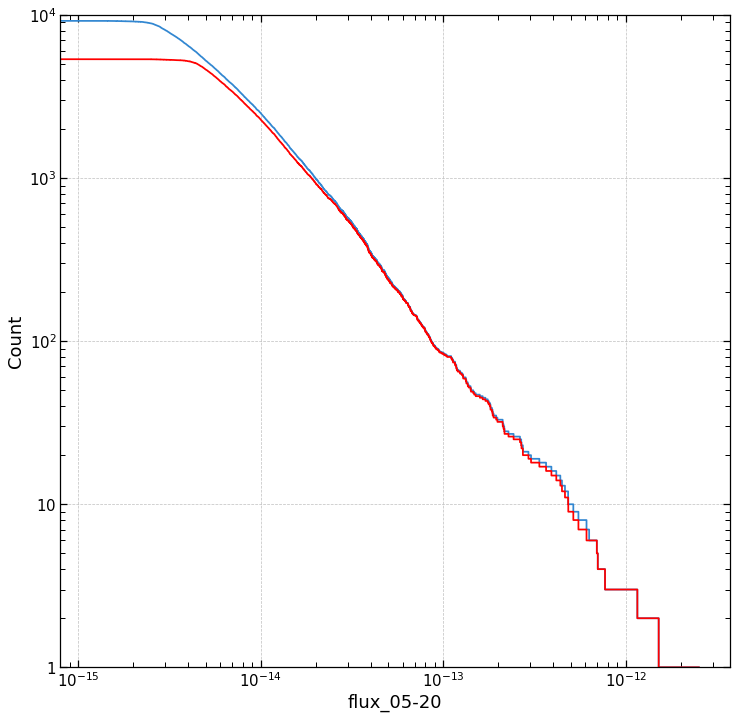

In [21]:
fig,  ax =  plt.subplots( figsize = (12,12))
sns.ecdfplot(ero_df.query("DET_LIKE_0>6")['flux_05-20'], log_scale=True, complementary=True, label='ero_csc_orig', stat='count', ax=ax)

sns.ecdfplot(ero_df.query("DET_LIKE_0>15")['flux_05-20'], log_scale=True, complementary=True, label='ero_csc_orig', stat='count', ax=ax, color = 'r')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1, 1e4)

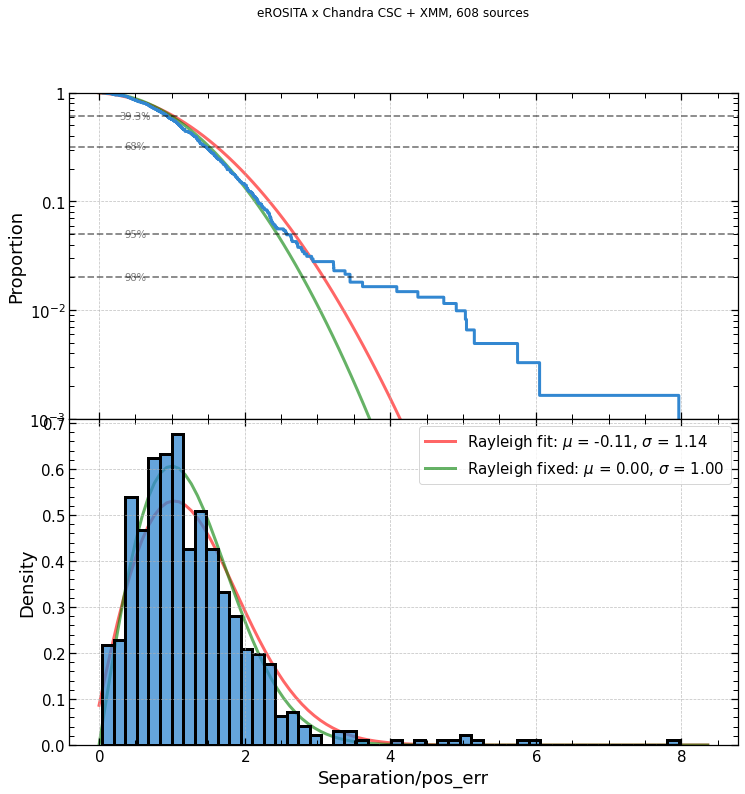

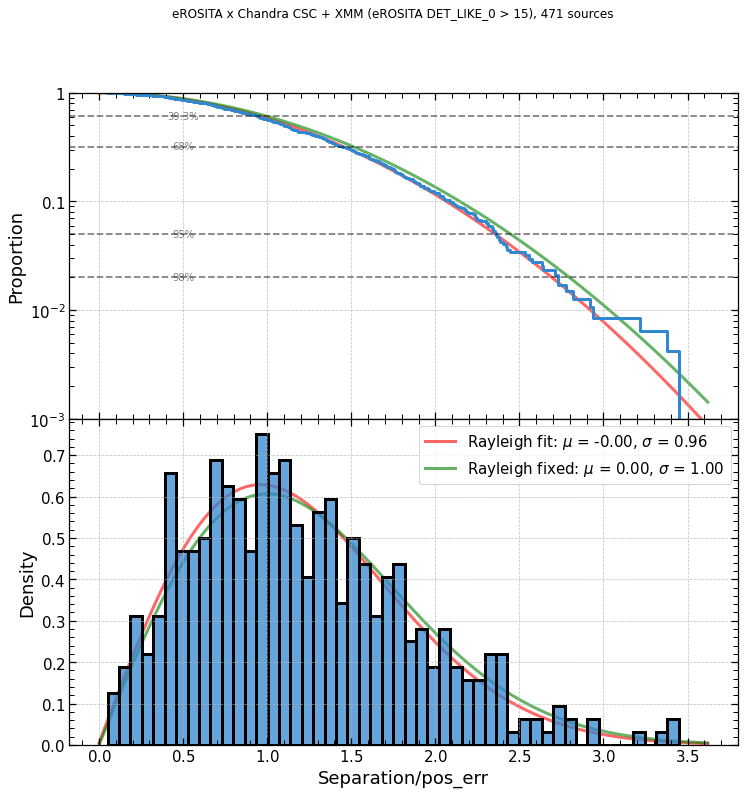

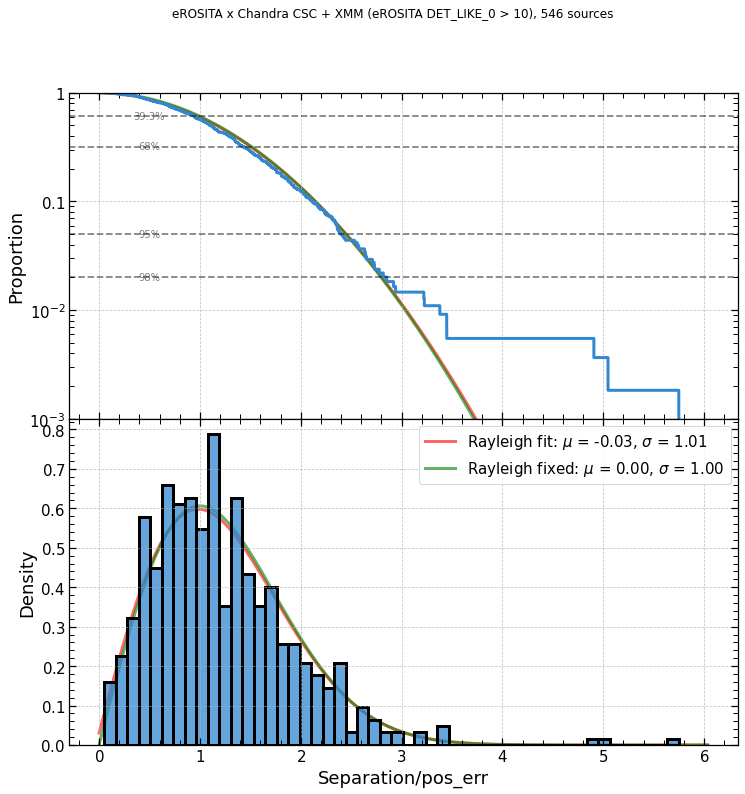

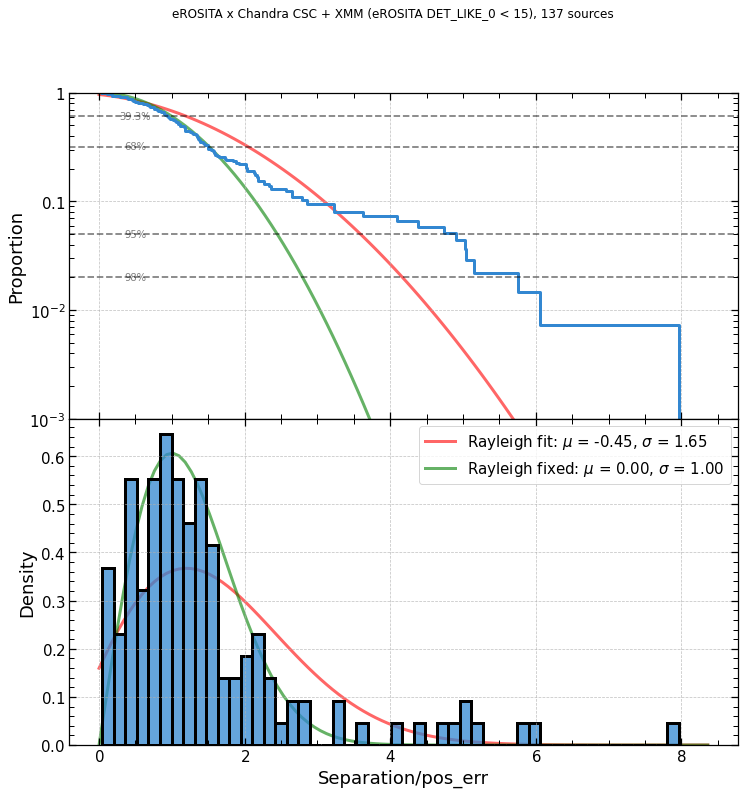

In [22]:
from scripts.cross_match_scripts import rayleigh_plot
rayleigh_plot(final_ctps, sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM')
rayleigh_plot(final_ctps.query('DET_LIKE_0>15'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 > 15)')

rayleigh_plot(final_ctps.query('DET_LIKE_0>10'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 > 10)')


rayleigh_plot(final_ctps.query('DET_LIKE_0<15'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 < 15)')



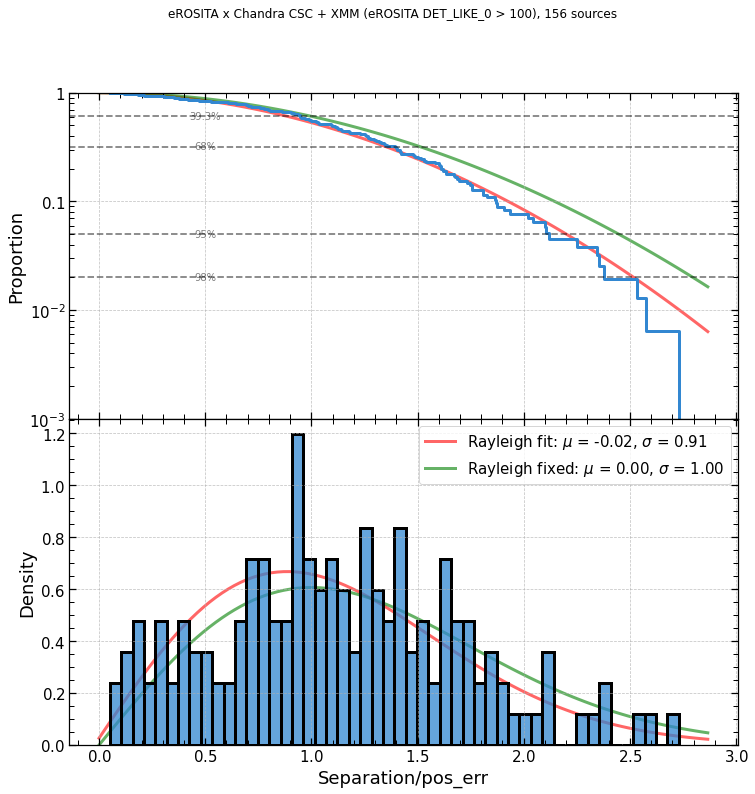

In [23]:
rayleigh_plot(final_ctps.query('DET_LIKE_0>100'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 > 100)')



## distribution over separations

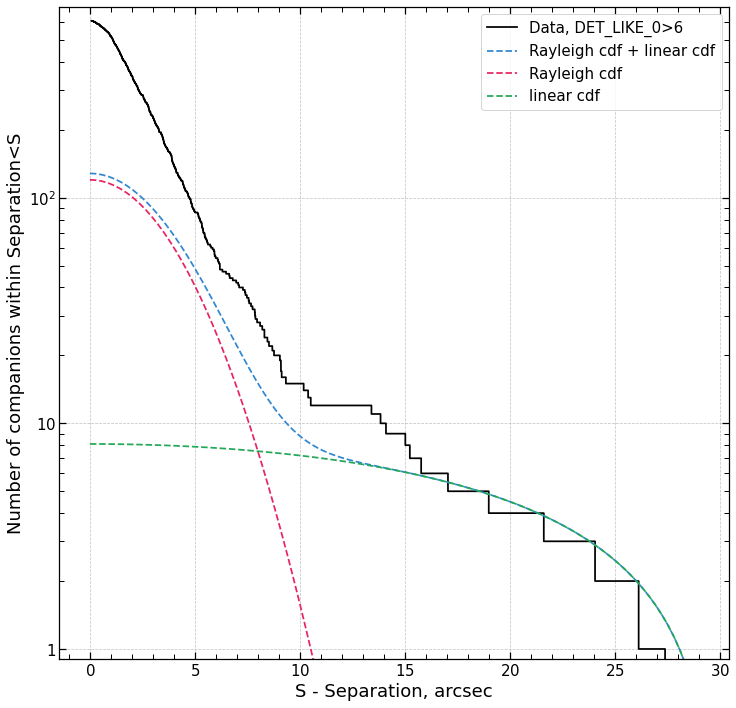

In [24]:
%matplotlib inline
query = 'DET_LIKE_0>6'
seps = final_ctps.query(query)['sep_ero_desi']
sep_bins = np.linspace(0, 30, 300)

sep_hist, bin_edges = np.histogram(seps, bins=sep_bins)
sep_hist = np.cumsum(sep_hist)
hist_area = sep_hist
sep_axis = (bin_edges[1:] + bin_edges[:-1])/2
fig,  ax =  plt.subplots( figsize = (12,12))

#ax.bar(sep_axis, hist_area, width = 1, alpha = 0.4)
sns.ecdfplot(seps, color='k', ax = ax, stat='count', log_scale=False, label = 'Data, '+query , complementary=True)
ax.set_xlabel('S - Separation, arcsec')
ax.set_ylabel('Number of companions within Separation<S')


from scipy.optimize import curve_fit
from scipy import stats
def gaus_cdf(x,N,sep0,sep_sigma):
    #return N*stats.norm.cdf(x, loc=sep0, scale=sep_sigma)
    return N*(1-stats.rayleigh.cdf(x, loc=sep0, scale=sep_sigma))

def linear_cdf(x,a):
    #b = -60*a
    #return a*x**2+b*x
    #return a*x**2
    return a *(30**2-x**2)

def model_cdf(x, N, sep0, sep_sigma, a):
    return gaus_cdf(x,N,sep0,sep_sigma)  + linear_cdf(x,a)

#popt, pcov = curve_fit(model_cdf, sep_axis, hist_area, p0=[1, 1, 2,  0])
#print(popt)
popt = [120, 0,  3.4, 0.9e-2]
x = np.linspace(0, 29, 100)
ax.plot(x, model_cdf(x, *popt), 'C0--', label = 'Rayleigh cdf + linear cdf')
ax.plot(x, gaus_cdf(x, *popt[:3]), 'C1--', label = 'Rayleigh cdf')
ax.plot(x, linear_cdf(x, *popt[3:]), 'C2--', label = 'linear cdf')
ax.legend()
#n_false  =linear_cdf(30, *popt[3:])
#ax.axhline(n_false, color='g', linestyle=':')
#ax.text(10, n_false+n_false/2, 'Number of false companions = {:.0f}'.format(n_false),  va='top', ha='left', fontsize = 19)

#print('Number of false companions', n_false)
ax.set_yscale('log')
ax.set_ylim(0.9, 700)
plt.show()
